In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

In [2]:
throws, sum_prog, std  = np.loadtxt("result1.1.r.csv", delimiter=",", unpack='true', skiprows=1)

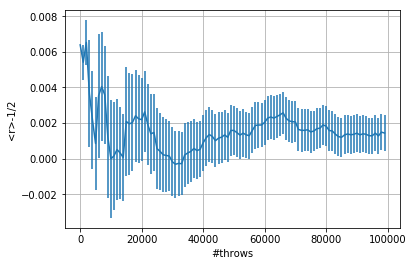

In [3]:
plt.errorbar(throws,sum_prog-0.5,yerr=std)
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()

$\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>

In [4]:
throws, sum_prog, std  = np.loadtxt("result1.1.sigma.csv", delimiter=",", unpack='true', skiprows=1)

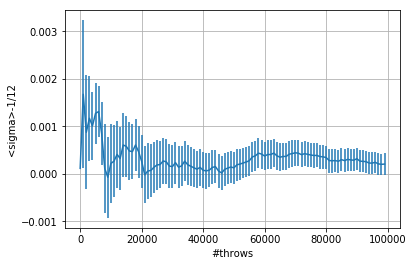

In [5]:
plt.errorbar(throws,(sum_prog - 1./12.),yerr=std)
plt.xlabel('#throws')
plt.ylabel('<sigma>-1/12')
plt.grid(True)
plt.show()

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely.

In [37]:
chi  = np.loadtxt("result1.1.chi.csv", delimiter=",", unpack='true', skiprows=1)

In [38]:
np.mean(chi)

99.5756

In [39]:
np.std(chi)

13.26333278780262

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note that you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

#### Gaussian DIce Sums

In [25]:
gaus1, gaus2, gaus10, gaus100 = np.loadtxt("result1.2.gauss.csv", delimiter=",", unpack='true', skiprows=1)

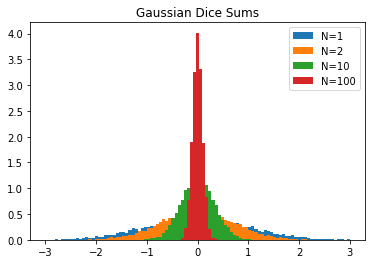

In [26]:
bins = np.linspace(-3,3,100)
plt.hist(gaus1, bins = bins, label="N=1", density = True);
plt.hist(gaus2, bins = bins, label="N=2", density = True);
plt.hist(gaus10, bins = bins, label="N=10", density = True);
plt.hist(gaus100, bins = bins, label="N=100", density = True);
plt.title("Gaussian Dice Sums")
plt.legend(loc = "upper right");

#### Exponential Sums

In [27]:
exp1, exp2, exp10, exp100 = np.loadtxt("result1.2.exp.csv", delimiter=",", unpack='true', skiprows=1)

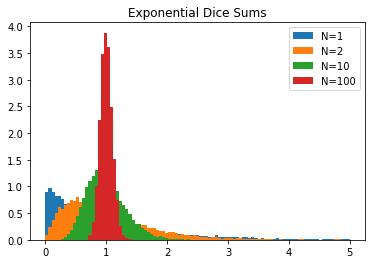

In [28]:
bins = np.linspace(0,5,100)
plt.hist(exp1, bins = bins, label="N=1", density = True);
plt.hist(exp2, bins = bins, label="N=2", density = True);
plt.hist(exp10, bins = bins, label="N=10", density = True);
plt.hist(exp100, bins = bins, label="N=100", density = True);
plt.title("Exponential Dice Sums")
plt.legend(loc = "upper right");

#### Loretzian Sums

In [51]:
lor1, lor2, lor10, lor100 = np.loadtxt("result1.2.lorentz.csv", delimiter=",", unpack='true', skiprows=1)

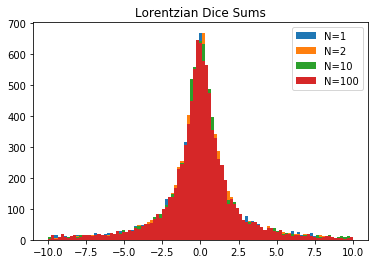

In [52]:
bins = np.linspace(-10,10,100)
plt.hist(lor1, bins = bins, label="N=1", density =  False);
plt.hist(lor2, bins = bins, label="N=2", density = False);
plt.hist(lor10, bins = bins, label="N=10", density = False);
plt.hist(lor100, bins = bins, label="N=100", density = False);
plt.title("Lorentzian Dice Sums")
plt.legend(loc = "upper right");

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

In [53]:
throws, sum_prog, std  = np.loadtxt("result1.3.pi.csv", delimiter=",", unpack='true', skiprows=1)

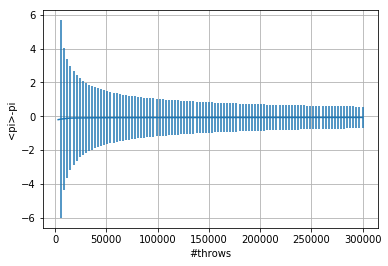

In [54]:
plt.errorbar(throws,(sum_prog - np.pi),yerr=std)
plt.xlabel('#throws')
plt.ylabel("<pi>-pi")
plt.grid(True)
plt.show()